<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Importing the facemask dataset

In [2]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

 data		      download.jpeg	      images.jpeg   sample_data
'download (1).jpeg'   face-mask-dataset.zip   kaggle.json


Importing the Libraries

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1438.jpg', 'with_mask_657.jpg', 'with_mask_1455.jpg', 'with_mask_1994.jpg', 'with_mask_2449.jpg']
['with_mask_2095.jpg', 'with_mask_504.jpg', 'with_mask_3561.jpg', 'with_mask_3508.jpg', 'with_mask_2984.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_28.jpg', 'without_mask_3495.jpg', 'without_mask_2228.jpg', 'without_mask_2197.jpg', 'without_mask_2127.jpg']
['without_mask_1617.jpg', 'without_mask_3563.jpg', 'without_mask_1189.jpg', 'without_mask_756.jpg', 'without_mask_172.jpg']


In [8]:
print('The number of with mask images: ', len(with_mask_files))
print('The number of without mask images: ', len(without_mask_files))

The number of with mask images:  3725
The number of without mask images:  3828


**Creating a labels for two class of images**

In [9]:
# Create a Labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Image

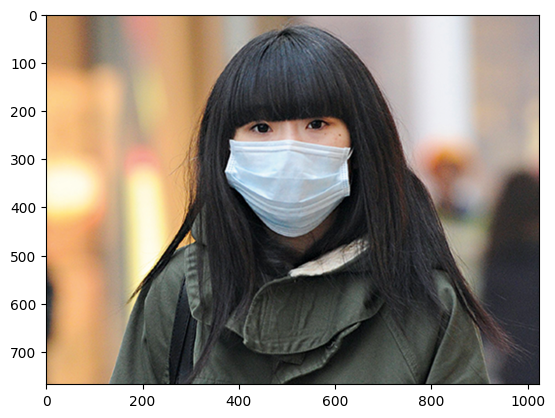

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3312.jpg')
imgplot = plt.imshow(img)
plt.show()

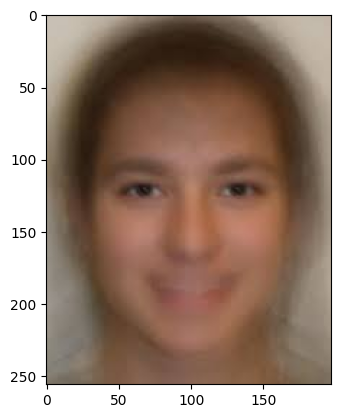

In [14]:
# displaying the without mask imaege
img = mpimg.imread('/content/data/without_mask/without_mask_2167.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1.Resize the image

2.Convert the images to numpy


In [15]:
# Convert images to numpy array
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[255, 255, 255],
        [249, 249, 249],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [252, 252, 252],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [243, 243, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[151, 109,  61],
        [149, 109,  65],
        [159, 124,  89],
        ...,
        [244, 222, 222],
        [244, 223, 223],
        [243, 221, 222]],

       [[161, 122,  90],
        [184, 148, 118],
        [204, 172, 148],
        ...,
        [244, 223, 222],
        [246, 224, 224],
        [241, 219, 219]],

       [[199, 167, 151],
        [216, 184, 171],
        [239, 210, 199],
        ...,
        [245, 224, 221],
        [248, 227, 224],
        [239, 218, 215]]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X_train.shape, X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# Scaling the data
X_train_scale = X_train/255
X_test_scale = X_test/255

In [29]:
X_train[0]

array([[[244, 253, 198],
        [240, 249, 194],
        [235, 244, 187],
        ...,
        [214, 209, 167],
        [214, 209, 167],
        [214, 209, 167]],

       [[242, 251, 194],
        [238, 246, 189],
        [232, 241, 184],
        ...,
        [214, 209, 167],
        [214, 209, 167],
        [214, 209, 167]],

       [[239, 248, 188],
        [235, 243, 184],
        [229, 236, 177],
        ...,
        [215, 210, 168],
        [215, 210, 168],
        [215, 210, 168]],

       ...,

       [[ 42,  49,  59],
        [ 41,  48,  58],
        [ 40,  47,  57],
        ...,
        [188,  93,  96],
        [188,  93,  96],
        [191,  95,  97]],

       [[ 41,  48,  58],
        [ 39,  46,  56],
        [ 38,  45,  55],
        ...,
        [190,  89,  95],
        [197,  94, 100],
        [198,  93,  98]],

       [[ 41,  48,  58],
        [ 39,  46,  56],
        [ 38,  45,  55],
        ...,
        [190,  89,  95],
        [197,  93, 100],
        [198,  93,  98]]

In [30]:
X_train_scale[0]

array([[[0.95686275, 0.99215686, 0.77647059],
        [0.94117647, 0.97647059, 0.76078431],
        [0.92156863, 0.95686275, 0.73333333],
        ...,
        [0.83921569, 0.81960784, 0.65490196],
        [0.83921569, 0.81960784, 0.65490196],
        [0.83921569, 0.81960784, 0.65490196]],

       [[0.94901961, 0.98431373, 0.76078431],
        [0.93333333, 0.96470588, 0.74117647],
        [0.90980392, 0.94509804, 0.72156863],
        ...,
        [0.83921569, 0.81960784, 0.65490196],
        [0.83921569, 0.81960784, 0.65490196],
        [0.83921569, 0.81960784, 0.65490196]],

       [[0.9372549 , 0.97254902, 0.7372549 ],
        [0.92156863, 0.95294118, 0.72156863],
        [0.89803922, 0.9254902 , 0.69411765],
        ...,
        [0.84313725, 0.82352941, 0.65882353],
        [0.84313725, 0.82352941, 0.65882353],
        [0.84313725, 0.82352941, 0.65882353]],

       ...,

       [[0.16470588, 0.19215686, 0.23137255],
        [0.16078431, 0.18823529, 0.22745098],
        [0.15686275, 0

**Building a Conventional Neural Network**

In [31]:
import tensorflow as tf

In [32]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [33]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
# Training the neural network
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 29ms/step - loss: 0.4691 - acc: 0.8010 - val_loss: 0.4077 - val_acc: 0.8298
Epoch 2/5
170/170 [==============================] - 4s 21ms/step - loss: 0.2649 - acc: 0.8944 - val_loss: 0.2955 - val_acc: 0.8678
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2201 - acc: 0.9125 - val_loss: 0.2590 - val_acc: 0.9025
Epoch 4/5
170/170 [==============================] - 3s 20ms/step - loss: 0.1750 - acc: 0.9327 - val_loss: 0.2612 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 4s 22ms/step - loss: 0.1491 - acc: 0.9472 - val_loss: 0.2565 - val_acc: 0.9157


Model evaluation

In [35]:
loss, accuracy = model.evaluate(X_test_scale, Y_test)

48/48 [==============================] - 1s 12ms/step - loss: 0.1961 - acc: 0.9318


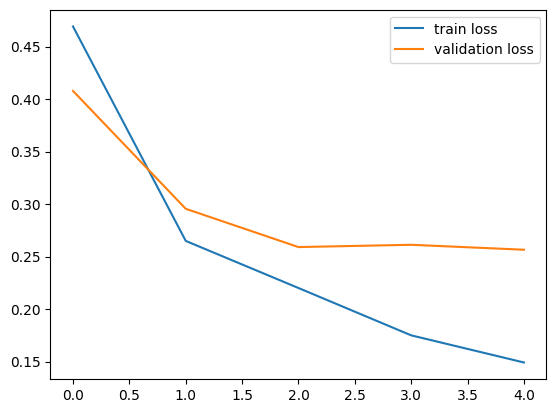

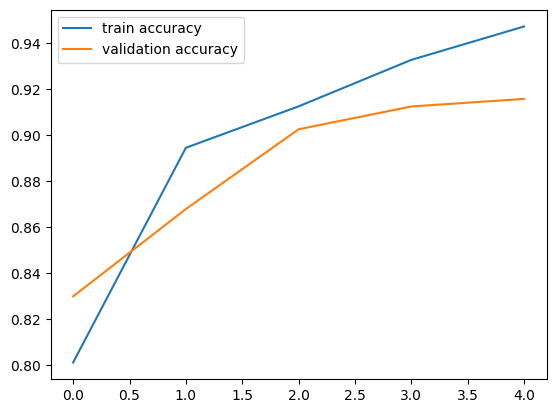

In [36]:
# Plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/without_mask/without_mask_2167.jpg


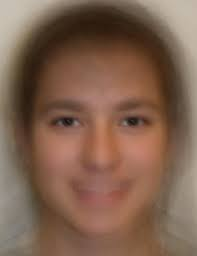

1/1 [==============================] - 0s 20ms/step
[[0.4028904 0.7187777]]
1
The person in the image is wearing a mask


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')